In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("./articulos_ml.csv")

In [3]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

In [27]:
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])
 
dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
dataX2["comments"] = filtered_data['# of comments'].fillna(0)
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

In [28]:
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.39017245 -614.90572023  312.76835195]
Mean squared error: 349861906.20
Variance score: 0.11


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

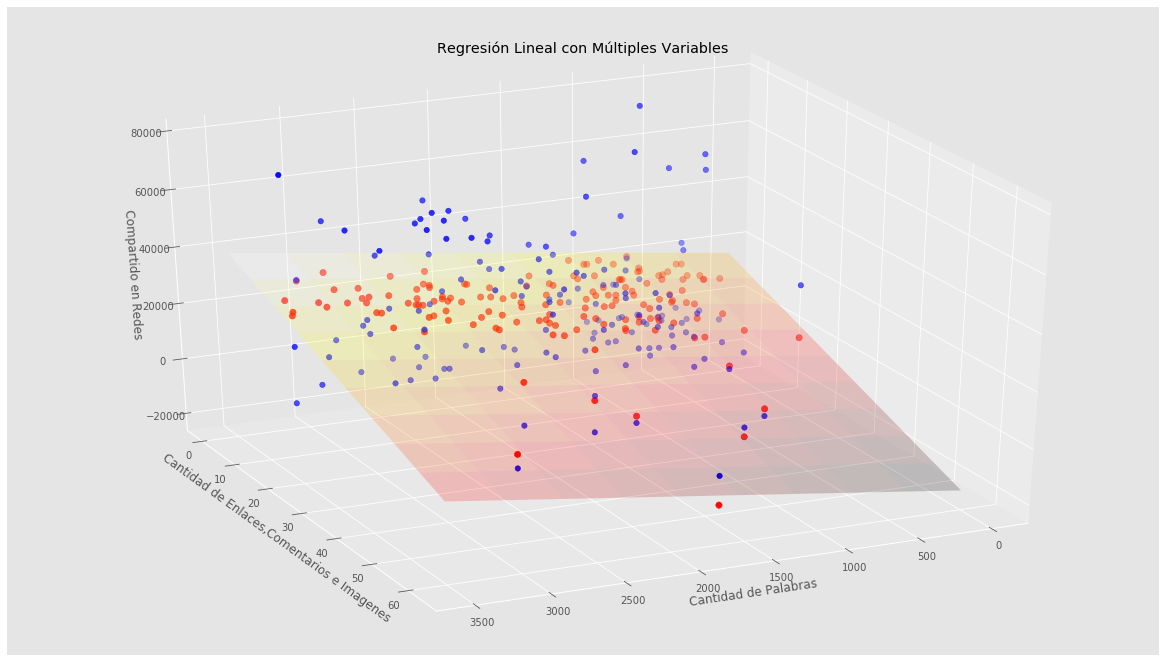

In [29]:
fig = plt.figure()
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
 
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
 
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
 
# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

In [35]:
# Si quiero predecir cuántos "Shares" voy a obtener por un artículo con: 
# 2000 palabras y con enlaces: 10, , imagenes: 6, comentarios: 30
# según nuestro modelo, hacemos:
 
z_Dosmil = regr2.predict([[2000, 10+6,30]])
print(int(z_Dosmil))

29761


In [34]:
dataX2

,Word count,suma,comments
1,1742,18.0,0.0
2,962,7.0,0.0
5,761,1.0,0.0
7,753,4.0,0.0
8,1118,3.0,0.0
...,...,...,...
156,3239,15.0,11.0
157,2566,15.0,8.0
158,2089,9.0,4.0
159,1530,19.0,12.0


In [18]:
data

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660
